In [1]:
import sympy as sp

# Define symbols.
σ, γ, β, α, δ, τ, Nw, κ, θ = sp.symbols('σ γ β α δ τ N κ θ')

# Define variables.
S, C, ε = sp.var('S C ε')

In [2]:
λ    = β * C / Nw + ε

eq1 = sp.Eq(0, (1-0) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0,       λ * S    - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)

equilibria = [sp.simplify(l) for l in sp.solve([eq1, eq2, eq3], [S, C, ε])]

####-####-####-####
eql0    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[0]]
eql1    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[1]]
####-####-####-####

variables = ["\\bar{S}", "\\bar{C}", "\\bar{\epsilon}"]
for idx_s, l in enumerate(eql0):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))

print( "\n" )

for idx_s, l in enumerate(eql1):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))


\bar{S}= \frac{N \sigma}{\delta}
\bar{C}= 0
\bar{\epsilon}= 0


\bar{S}= \frac{N \kappa \left(\delta + \tau\right)}{\beta \kappa + \theta}
\bar{C}= \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \left(\beta \kappa + \theta\right)}
\bar{\epsilon}= \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \kappa \left(\beta \kappa + \theta\right)}


# Assuming importations are negligible

1. DFE

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \sigma}{\delta}\\
            \bar{C}=& 0\\
            \bar{\epsilon}=&0
        \end{split}
    \end{equation}
2. non-DFE

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \kappa \left(\delta + \tau\right)}{\beta \kappa + \theta}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=& \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}


In [3]:
# NGM

eq1 = sp.Eq(0, (1-γ) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0, γ * σ * Nw     + λ * S - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)


f1 = β * S * (C)/Nw + ε * S
f2 = θ * C / Nw

v1 = τ * C + δ * C
v2 = κ * ε

F     = sp.Matrix([f1, f2]); F = F.jacobian([C, ε])
V     = sp.Matrix([v1, v2]); V = V.jacobian([C, ε])
V_inv = V.inv()

Rnots = sp.MatMul(F * V_inv)
Rnots = sp.Matrix(Rnots).subs(S, Nw * σ / δ)
Rnots = list(Rnots.eigenvals().keys())

for idx_l, l in enumerate(Rnots):
    l = sp.simplify(l)
    print(r"$\lambda$_{}=".format(idx_l+1)+""+sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("{2}", "2").replace("{1}", "1"))


$\lambda$_1=\frac{\beta κ \sigma - \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}
$\lambda$_2=\frac{\beta κ \sigma + \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}


# Basic reproduction number

$$\lambda_2=\frac{\beta κ \sigma + \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}$$

$$\mathcal{R}_H =\frac{\beta}{\tau+\delta},\quad \mathcal{R}_E=\frac{\theta}{\kappa(\delta+\tau)}$$

$$\mathcal{R}_0 = \frac{1}{2}\frac{\sigma}{\delta}\mathcal{R}_H +\sqrt{\frac{\sigma}{\delta}\mathcal{R}_E+\frac{1}{4}\frac{\sigma^2}{\delta^2} \mathcal{R}_H}$$

In [4]:
# Considering importations
λ    = β * C / Nw + ε

eq1 = sp.Eq(0, (1-γ) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0, γ * σ * Nw + λ * S    - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)

equilibria = [sp.simplify(l) for l in sp.solve([eq1, eq2, eq3], [S, C, ε])]

####-####-####-####
eql0    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[0]]
eql1    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[1]]
####-####-####-####

variables = ["\\bar{S}", "\\bar{C}", "\\bar{\epsilon}"]
for idx_s, l in enumerate(eql0):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))

print( "\n" )

for idx_s, l in enumerate(eql1):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))



\bar{S}= \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma - \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \theta \kappa \sigma + \delta^{2} \kappa^{2} \tau^{2} - 2 \delta \theta \kappa \sigma \tau + \theta^{2} \sigma^{2}}\right)}{2 \delta \left(\beta \kappa + \theta\right)}
\bar{C}= \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \thet

# Considering importations

1. Equilibrium 1

    $D = \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \theta \kappa \sigma + \delta^{2} \kappa^{2} \tau^{2} - 2 \delta \theta \kappa \sigma \tau + \theta^{2} \sigma^{2}}$

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=&\frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}

2. Equilibrium 2

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=& \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}





In [5]:
# Stability
f1 = (1-γ) * σ * Nw - λ * S - δ * S + τ * C
f2 = γ * σ * Nw + λ * S    - δ * C - τ * C
f3 = θ * C / Nw - κ * ε

F        = sp.Matrix([f1, f2, f3]); F = F.jacobian([S, C, ε])
F        = F.subs([(S, eql0[0]), (C, eql0[1]), (ε, eql0[2])])
eig_vals = [sp.factor(sp.simplify(k)) for k in F.eigenvals().keys()]


In [6]:
import pandas as pd
params_sim_df = pd.DataFrame(columns=["γ", "β", "θ", "κ"])


gammas = [5/100, 15/100, 25/100, 50/100, 75/100, 80/100]
kappas = [1/(1 * 30),  1/(3*30), 1/(6*30), 1/(12*30), 1/(24*30), 1/(36*30)]
betas  = [0.01, 0.025, 0.05, 0.1]
tetas  = [1e-3, 1e-2]

idx_sim =1
for g in gammas:
    for k in kappas:
        for b in betas:
            for θ in tetas:
                    params_sim_df = params_sim_df.append({"γ": g, "β": b, "θ": θ, "κ": k, "sim_id": int(idx_sim)}, ignore_index=True)
                    idx_sim += 1

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/3121036175.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params_sim_df = params_sim_df.append({"γ": g, "β": b, "θ": θ, "κ": k, "sim_id": int(idx_sim)}, ignore_index=True)
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/3121036175.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params_sim_df = params_sim_df.append({"γ": g, "β": b, "θ": θ, "κ": k, "sim_id": int(idx_sim)}, ignore_index=True)
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/3121036175.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params_sim_df = params_sim_df.append({"γ": g, "β": b, "θ": θ, "κ": k, "sim_id": int(idx_sim)}, ignore_index=True)
/var

In [7]:
import numpy as np


lamb_vals = sp.symbols('β θ')


arr2df = np.array([[], [], [], [], [], []])
for g in gammas:
    for k in kappas:
        eig1     = sp.simplify(eig_vals[1].subs([( δ , 0.5 ) , ( σ , 0.5 ), ( τ , 1/120 ), ( γ , g ), ( κ , k )]))
        eig2     = sp.simplify(eig_vals[2].subs([( δ , 0.5 ) , ( σ , 0.5 ), ( τ , 1/120 ), ( γ , g ), ( κ , k )]))

        f_eig_vals1 = sp.lambdify(lamb_vals, eig1)
        f_eig_vals2 = sp.lambdify(lamb_vals, eig2)
        tetas       = [1e-4, 1e-3, 1e-2, 2e-2]

        kappas_arr = k * np.ones(100)
        gammas_arr = g * np.ones(100)

        for teta in tetas:
            betas_arr = np.linspace(0.01, 0.8, 100)
            tetas_arr = teta * np.ones_like(betas_arr)

            λ1  = f_eig_vals1(betas_arr, tetas_arr)
            λ2  = f_eig_vals2(betas_arr, tetas_arr)

            λs     = np.concatenate([[λ1], [λ2], [betas_arr], [tetas_arr], [kappas_arr], [gammas_arr]])
            arr2df = np.concatenate([arr2df, λs], axis=1)

eigs_df = pd.DataFrame(arr2df.T, columns=["λ1", "λ2", "β", "θ", "κ", "γ"])



In [8]:

λ1.shape


(100,)

/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/1142661870.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/1142661870.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/1142661870.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/1142661870.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/var/folders/7p/jp6xqkvn5wb6ddl1fn0bhs980000gn/T/ipykernel_87168/1142661870.py:28: UserW

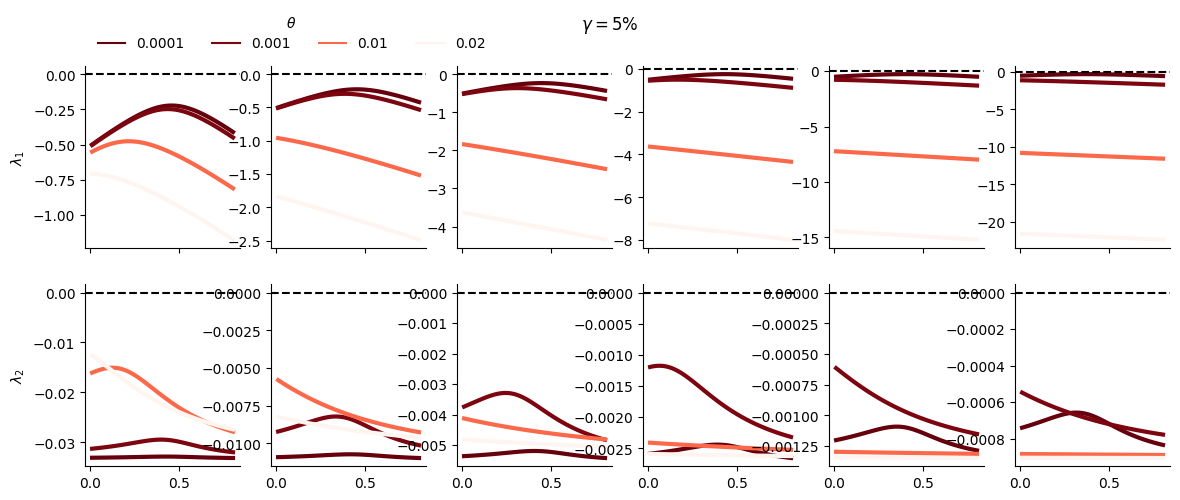

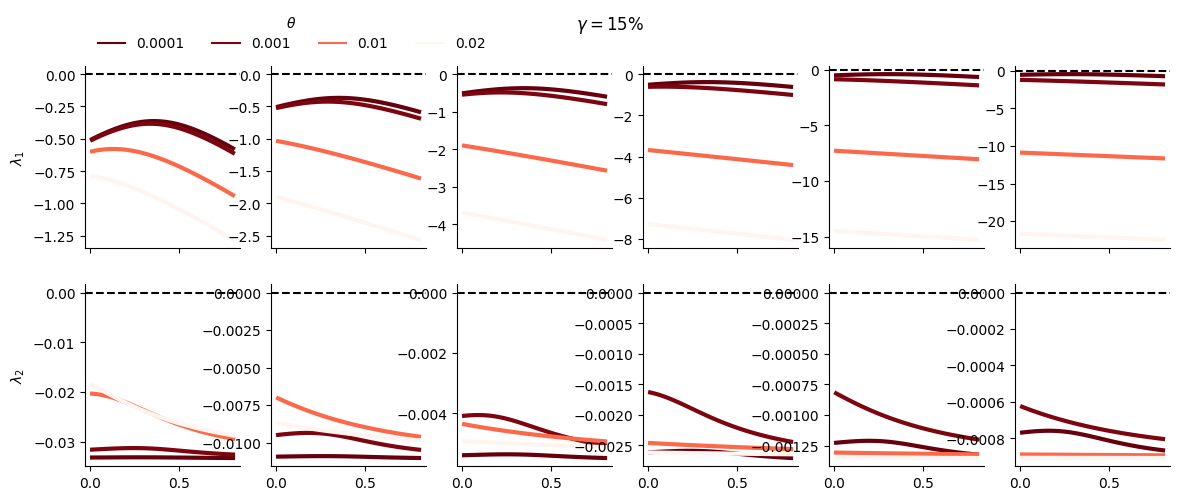

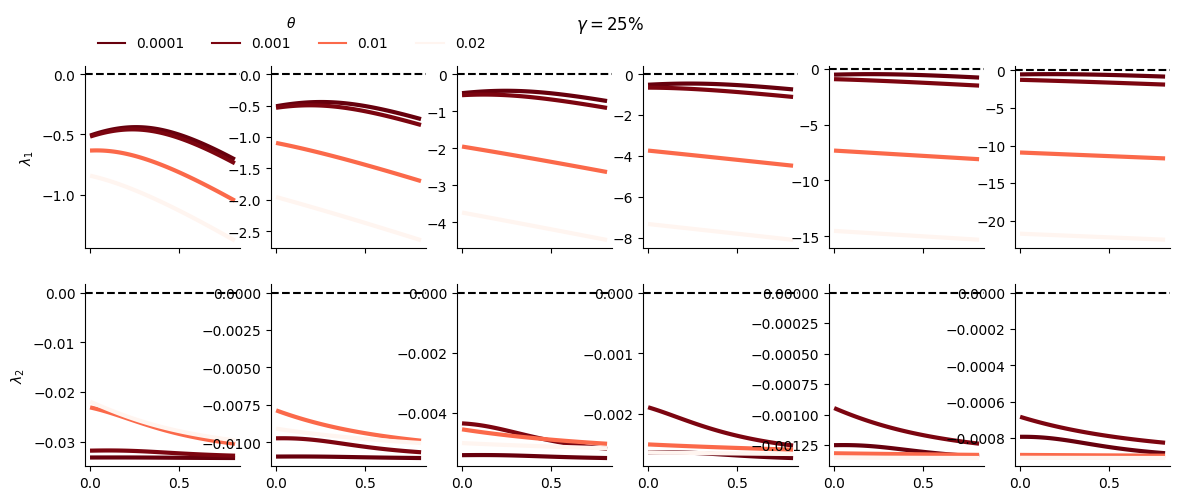

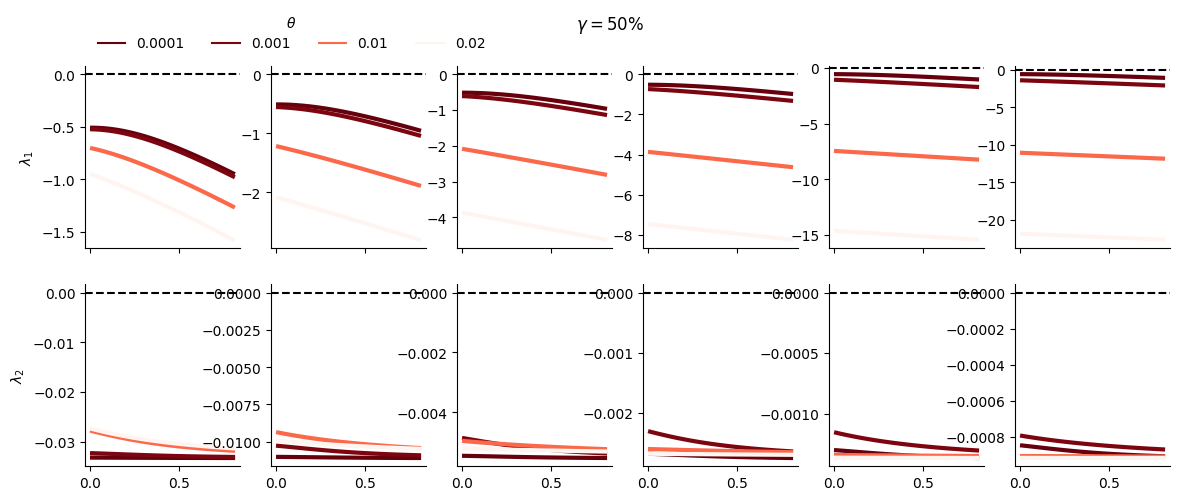

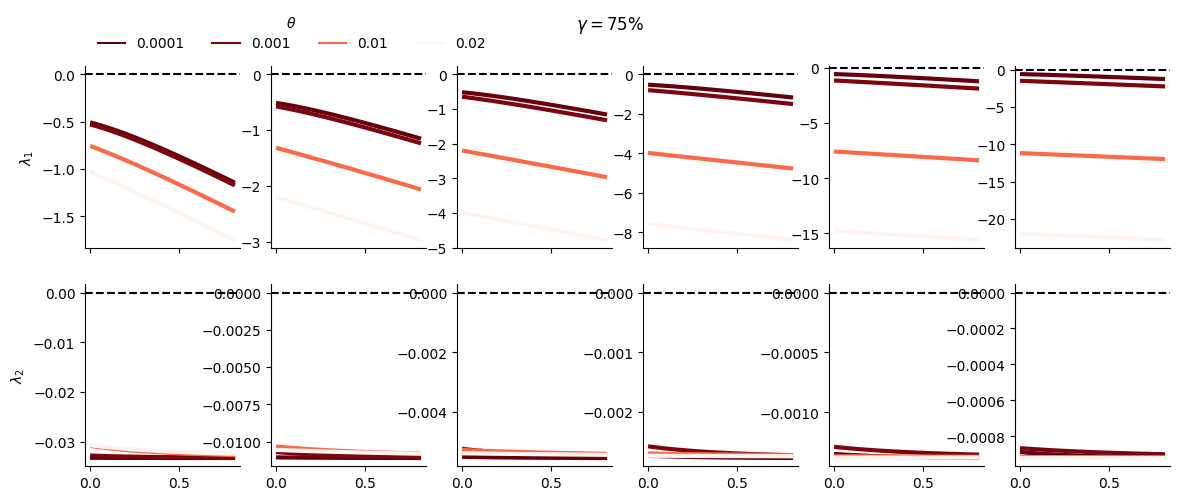

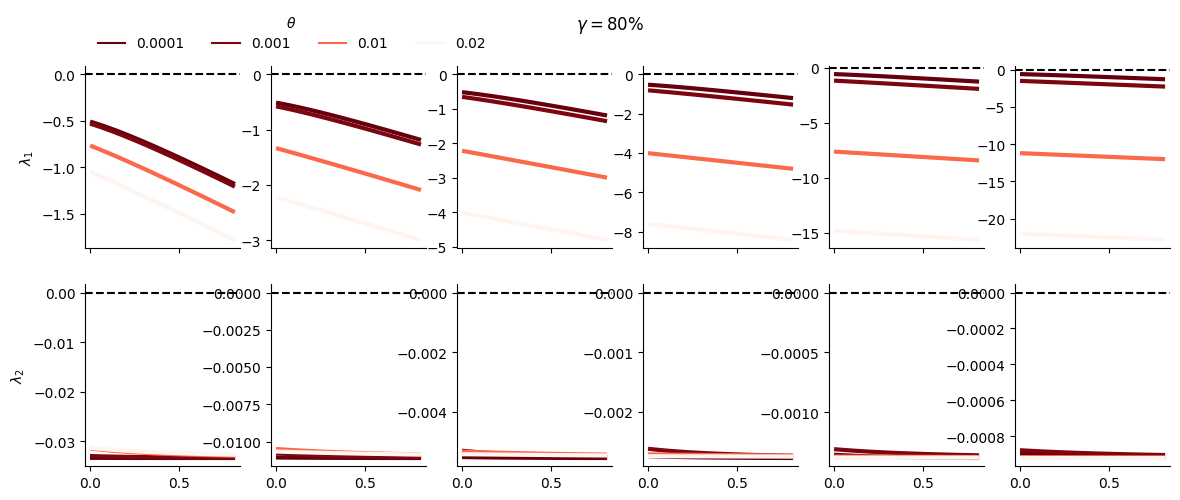

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for g in gammas:
    fig, ax = plt.subplots(2, len(kappas), figsize=(14, 5.2), sharex=True, sharey=False)
    for idx_k, kappa in enumerate(kappas):
        k_eig_df = eigs_df.query(f"γ == {g} and κ == {kappa}")

        sns.lineplot(ax=ax[0, idx_k], data=k_eig_df, x="β", y="λ1",  lw=3, hue="θ", palette="Reds_r")
        sns.lineplot(ax=ax[1, idx_k], data=k_eig_df, x="β", y="λ2",  lw=3, hue="θ", palette="Reds_r")

    for axi in ax.flatten():
        axi.spines['right'].set_visible(False)
        axi.spines['top'].set_visible(False)
        axi.legend().remove()
        axi.set_ylabel(None)
        axi.set_xlabel(None)

        axi.axhline(y=0, color="k", ls="--", lw=1.5)

    ax[0, 0].set_ylabel(r"$\lambda_1$")
    ax[1, 0].set_ylabel(r"$\lambda_2$")
    ax[0, 0].set_xlabel(r"Nosocomial transmission rate, $\beta$")
    ax[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=4, bbox_to_anchor=(0.0, 1.35), frameon=False)

    fig.suptitle("$\gamma=${:}%".format(int(g*100)))

    plt.tight_layout()